In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager

sns.set(style = 'whitegrid')
path      = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (6, 4)

In [ ]:
h = [100, 120, 130, 140, 150, 160, 170, 180, 190]
f = [200, 205, 210, 220, 230, 250, 270, 280, 285]

df = pd.DataFrame({'키' : h, '발크기' : f})

df['키'].corr(df['발크기'])

In [ ]:
plt.scatter(df['키'], df['발크기'])
plt.title("키와 발크기의 상관관계")
plt.xlabel('키')
plt.ylabel('발크기')
plt.show()

In [ ]:
height = [100, 200, 300, 400, 500, 600, 700, 800, 900]
temper = [18.0, 17.5, 17.0, 16.5, 15.0, 13.5, 13.0, 12.0, 11.0]
plt.figure(figsize=(3, 2))
df2 = pd.DataFrame({'높이' : height, '기온' : temper})
print(df2['높이'].corr(df2['기온']))
print(plt.scatter(df2['높이'], df2['기온']))
print(sns.relplot(x = '높이', y = '기온', data = df2))
plt.show()


In [ ]:
tips = sns.load_dataset('tips')
corr_tips = tips.corr()
corr_tips

In [ ]:
corr_heatmap = sns.heatmap(corr_tips, cbar = True, annot = True, annot_kws = {'size' : 20}, fmt = ".2f", square = True, cmap = 'Blues')

In [ ]:
x1 = np.random.rand(1000)
x2 = np.random.rand(1000)

df = pd.DataFrame({'x1' : x1, 'x2' : x2})
df['x1'].corr(df['x2'])

In [ ]:
sns.relplot(x = 'x1', y = 'x2', data = df)

# 상관관계분석과 상관계수
- 상관관계분석: 두 변수사이의 상관정도를 분석하는 것
- 상관계수 : 상관관계 강도를 나타는 것

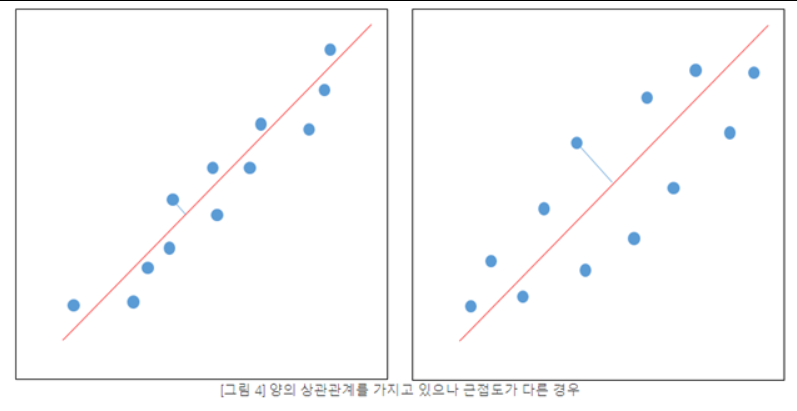

상관계수(기호 : r)
 - -1≤r≤1 의 값을 가짐

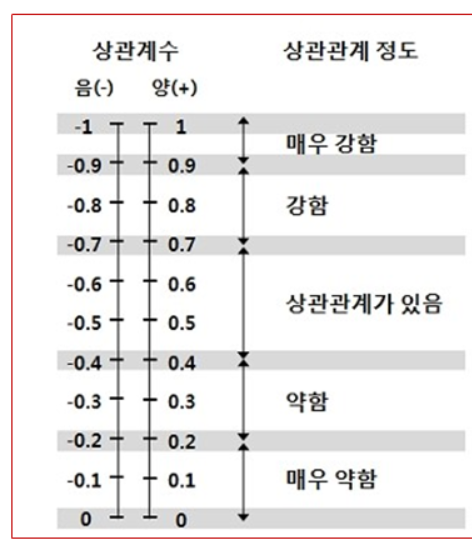

- 상관관계 분석식(모집단 전체의 상관계수 공식)

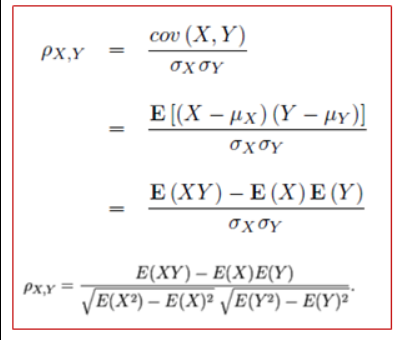


- 상관관계 분석식(표본: 일부 샘플들의 상관계수 공식)

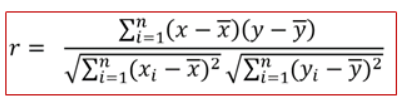

In [ ]:
import math

def correlation(x, y):
    n = len(x)
    x_sum = 0.0
    y_sum = 0.0
    x_sum_pow = 0.0
    y_sum_pow = 0.0
    mul_xy_sum = 0.0
    
    for i in range(n):
        mul_xy_sum += float(x[i] * y[i])
        x_sum += x[i]
        y_sum += y[i]
        x_sum_pow += x[i] ** 2
        y_sum_pow += y[i] ** 2

        try:
            r = ((n * mul_xy_sum) - (x_sum * y_sum)) / math.sqrt(((n * x_sum_pow) - x_sum ** 2) * ((n * y_sum_pow) - y_sum ** 2))
        except:
            r = 0.0
    return r

In [18]:
print(h, f)
print("키와 발크기에 대한 상관계수 : ", correlation(h, f))
print("산의 높이와 기온에 대한 상관계수 : ", correlation(height, temper))
print("임의의 배열 x1, x2 사이의 상관계수 : ", correlation(x1, x2))

[100, 120, 130, 140, 150, 160, 170, 180, 190] [200, 205, 210, 220, 230, 250, 270, 280, 285]
키와 발크기에 대한 상관계수 :  0.9661263235163509
산의 높이와 기온에 대한 상관계수 :  -0.9888665950759703
임의의 배열 x1, x2 사이의 상관계수 :  0.006732217808350424


In [47]:
w = [35, 37, 39, 40, 45, 50, 60, 70, 85]

data2 = {'키' : h, '발크기' : f, "몸무게" : w}
df2   = pd.DataFrame(data2)
df2_corr = df2.corr()

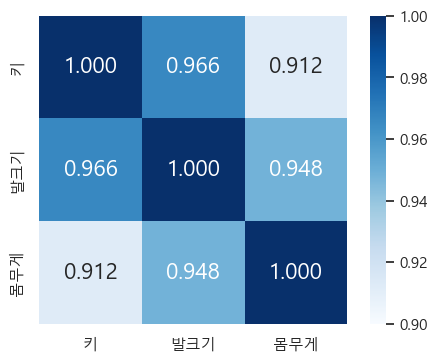

In [35]:
df2_corr_heatmap = sns.heatmap(df2_corr, cbar=True, annot=True, annot_kws={'size' : 16}, fmt='.3f', square=True, cmap='Blues', vmin=0.9, vmax=1.0)

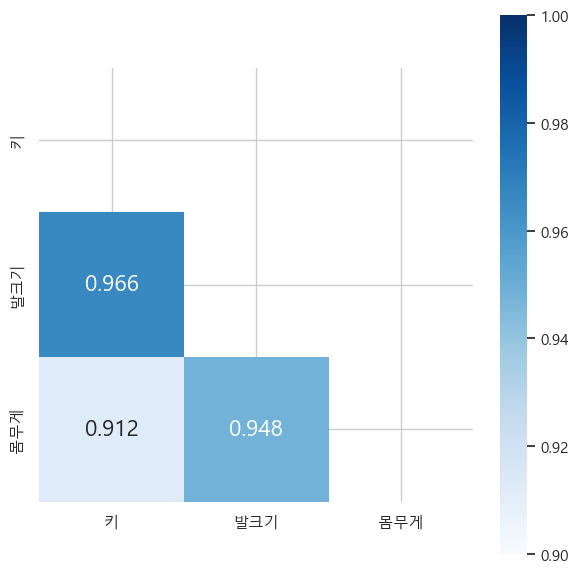

In [51]:
import numpy as np
fig, ax = plt.subplots(figsize=(7,7))
mask = np.zeros_like(df2_corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

df2_corr_heatmap = sns.heatmap(df2_corr, mask=mask,cbar=True, annot=True, annot_kws={'size' : 16}, fmt='.3f', square=True, cmap='Blues', vmin=0.9, vmax=1.0)

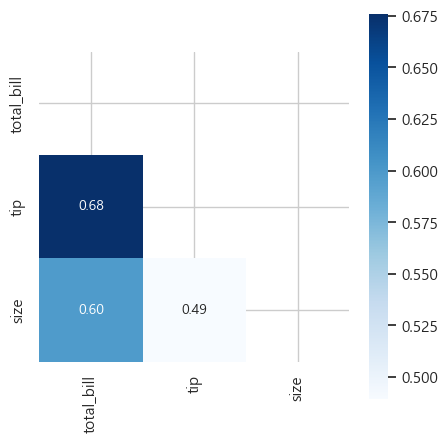

In [72]:
# import warnings
# warnings.filterwarnings('ignore')

tips_corr = tips.corr(numeric_only = True, method = 'pearson')
f, ax = plt.subplots(figsize = (5, 5))
ax.set_xticklabels(list(tips_corr.columns), rotation=90)
ax.set_yticklabels(list(tips_corr.columns), rotation=0)
mask2 = np.zeros_like(tips_corr, dtype=np.bool_)
mask2[np.triu_indices_from(mask2)] = True
tips_corr_heatmap = sns.heatmap(tips_corr, annot=True, annot_kws={'size' : 10}, square=True, fmt='.2f', cmap='Blues', mask=mask2)